# Project Title      : Stress Protector



*   Employer ID       : 2213144
*   Company Email     : mf22640@essex.ac.uk
*   Personal Email    : mfahikk1@gmail.com
*   Mobile No         : 07482449083






##Importing Libraries and dataset

In [28]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix


from imblearn.under_sampling import RandomUnderSampler

from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from keras.utils import to_categorical

In [58]:
df = pd.read_csv('/content/merged_data_labeled.csv')
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-73.0,13.0,2.0,0.454517,81.05,30.57,6B,2020-06-23 16:10:21.937499904,0.0
1,-89.0,-41.0,-17.0,0.425336,79.20,30.51,6B,2020-06-23 16:08:05.375000064,0.0
2,-42.0,-15.0,44.0,0.367454,64.42,29.93,6B,2020-06-23 15:51:32.312499968,0.0
3,-54.0,-9.0,-38.0,0.376417,81.43,30.61,6B,2020-06-23 16:10:33.906249984,0.0
4,-57.0,-9.0,31.0,0.000000,88.88,30.05,6B,2020-06-23 15:53:47.593750016,0.0


##Data Exploration

In [30]:
df['id'].unique()

array(['6B', '8B', 'CE', 'EG', '83', 'E4', '6D', 'DF', 'BG', '5C', 'F5',
       '15', '7A', '7E', '94'], dtype=object)

In [31]:
df.isnull().values.any()

False

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102396 entries, 0 to 102395
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         102396 non-null  float64
 1   Y         102396 non-null  float64
 2   Z         102396 non-null  float64
 3   EDA       102396 non-null  float64
 4   HR        102396 non-null  float64
 5   TEMP      102396 non-null  float64
 6   id        102396 non-null  object 
 7   datetime  102396 non-null  object 
 8   label     102396 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.0+ MB


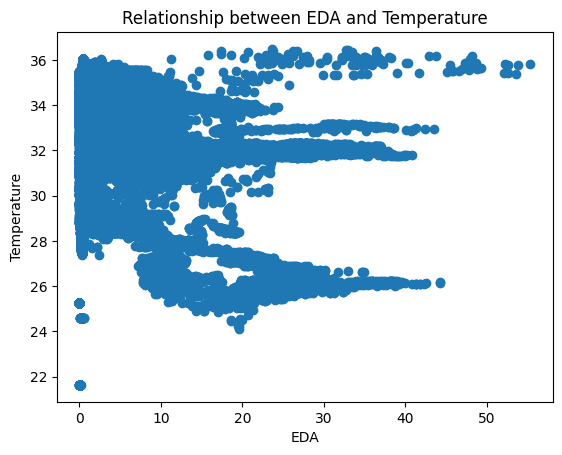

In [33]:
# plot the relationship between eda and temp
plt.scatter(df['EDA'], df['TEMP'])
plt.xlabel('EDA')
plt.ylabel('Temperature')
plt.title('Relationship between EDA and Temperature')
plt.show()


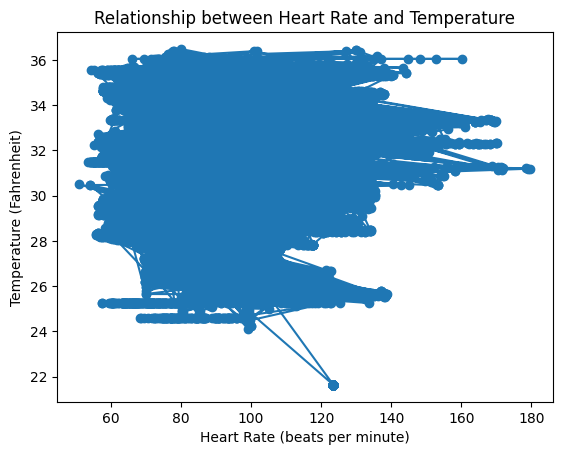

In [34]:
# plot hr and temp as a line graph
plt.plot(df['HR'], df['TEMP'], 'o-')
plt.xlabel('Heart Rate (beats per minute)')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Relationship between Heart Rate and Temperature')

# show the plot
plt.show()

In [35]:
# Convert the 'datetime' column to a Pandas datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Convert the 'id' column to categorical
df['id'] = df['id'].astype('category')

# Convert the 'label' column to categorical
df['label'] = df['label'].astype('category')

# Normalize the numerical columns using StandardScaler
scaler = StandardScaler()
df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']] = scaler.fit_transform(df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']])

# Print the information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102396 entries, 0 to 102395
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   X         102396 non-null  float64       
 1   Y         102396 non-null  float64       
 2   Z         102396 non-null  float64       
 3   EDA       102396 non-null  float64       
 4   HR        102396 non-null  float64       
 5   TEMP      102396 non-null  float64       
 6   id        102396 non-null  category      
 7   datetime  102396 non-null  datetime64[ns]
 8   label     102396 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6)
memory usage: 5.7 MB


In [36]:
# Count the number of samples in each class
df['label'].value_counts()


2.0    64049
0.0    30419
1.0     7928
Name: label, dtype: int64

##Removing Outliers

###Scatter plotter before removing outliers

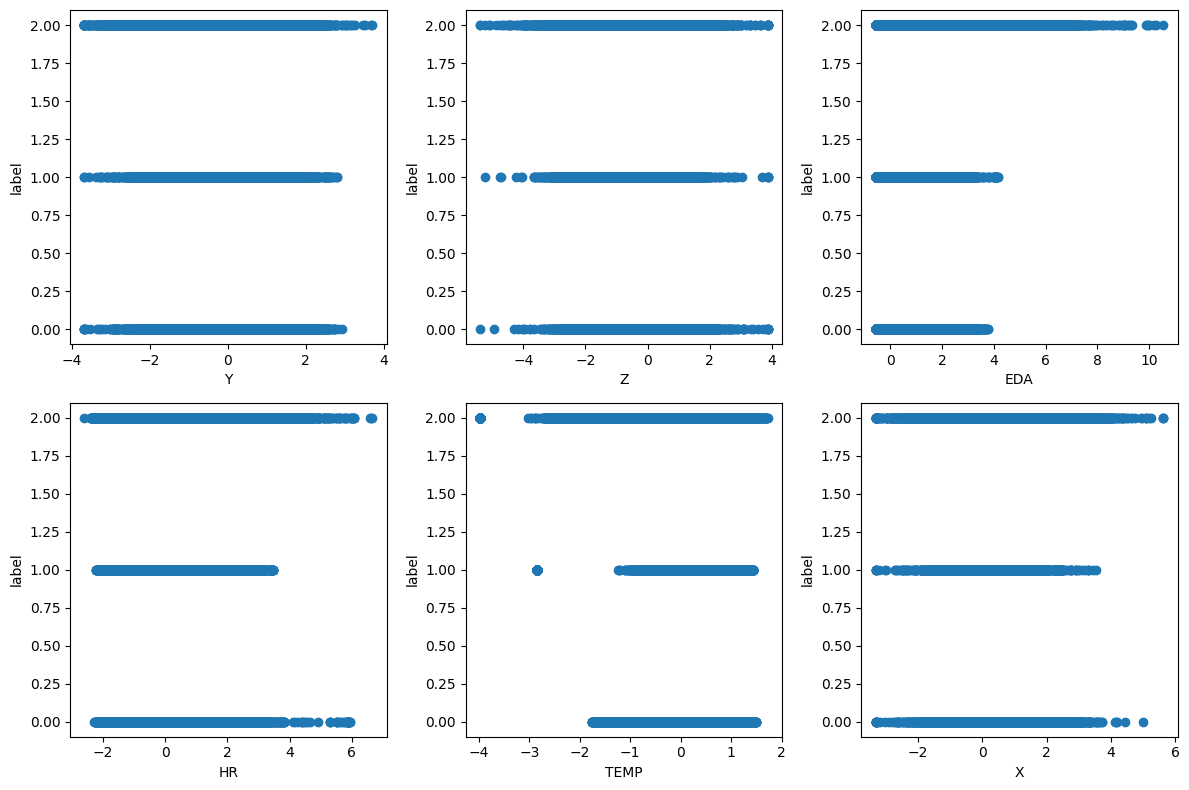

In [37]:
# Create a scatter plot for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axes = axes.flatten()
for i, feature in enumerate(df.columns):
    if feature not in ['id', 'datetime', 'label']:
        ax = axes[i-1]
        ax.scatter(df[feature], df['label'])
        ax.set_xlabel(feature)
        ax.set_ylabel('label')

plt.tight_layout()
plt.show()

###Removing outliers

In [38]:
# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the Z-score for each data point in each numerical column
z_scores = stats.zscore(df[num_cols])

# Define a threshold for outliers (Z-score of 3)
threshold = 3

# Identify the outlier indices
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove the outliers from the DataFrame
df = df.drop(outlier_indices[0], axis=0)

# Print the modified DataFrame
print(df)


               X         Y         Z       EDA        HR      TEMP  id  \
0      -1.393265  0.404487 -0.673563 -0.479381 -0.439740 -0.546975  6B   
1      -1.955135 -1.156538 -1.363378 -0.485248 -0.572793 -0.569990  6B   
2      -0.304643 -0.404934  0.851289 -0.496885 -1.635780 -0.792469  6B   
3      -0.726045 -0.231487 -2.125804 -0.495083 -0.412410 -0.531632  6B   
4      -0.831396 -0.231487  0.379311 -0.570764  0.123399 -0.746439  6B   
...          ...       ...       ...       ...       ...       ...  ..   
102391  1.697017  2.023327  0.306699 -0.484204 -0.644714  0.576926  94   
102392  1.697017  2.023327  0.306699 -0.484204 -0.682113 -0.079003  94   
102393  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.158819  94   
102394  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.158819  94   
102395  1.697017  2.023327  0.306699 -0.484204 -0.682113  0.680493  94   

                            datetime label  
0      2020-06-23 16:10:21.937499904   0.0  
1      2020-06-23 16:

###Scatter plotter after removing outliers

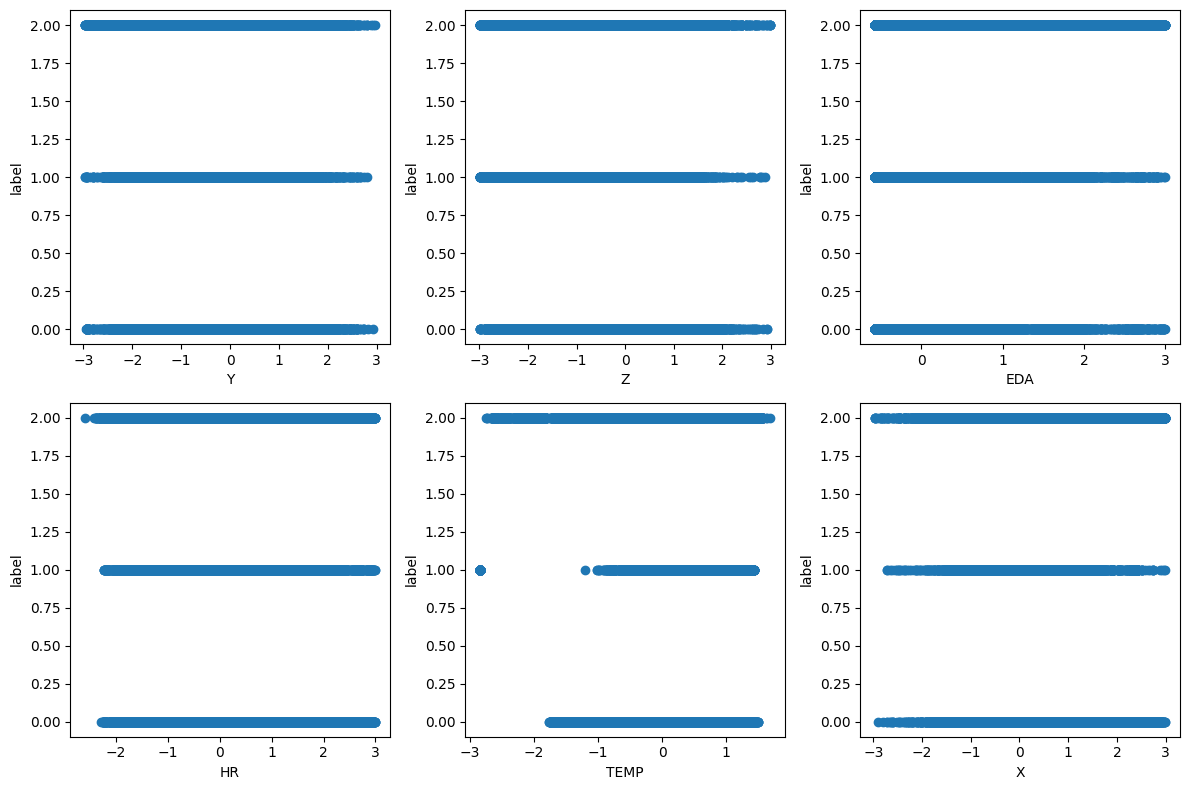

In [39]:
# Create a scatter plot for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axes = axes.flatten()
for i, feature in enumerate(df.columns):
    if feature not in ['id', 'datetime', 'label']:
        ax = axes[i-1]
        ax.scatter(df[feature], df['label'])
        ax.set_xlabel(feature)
        ax.set_ylabel('label')

plt.tight_layout()
plt.show()
plt.show()

##Feature scalling

In [40]:
# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler object
scaled_features = scaler.fit_transform(df[['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']])

# Create a new DataFrame with the scaled features and the remaining columns
scaled_df = pd.DataFrame(scaled_features, columns=['X_scaled', 'Y_scaled', 'Z_scaled', 'EDA_scaled', 'HR_scaled', 'TEMP_scaled'])
scaled_df[['id', 'datetime', 'label']] = df[['id', 'datetime', 'label']]

In [41]:
df.describe()

,X,Y,Z,EDA,HR,TEMP
count,95625.000000,95625.000000,95625.000000,95625.000000,95625.000000,95625.000000
mean,0.006968,-0.003040,0.023943,-0.126613,-0.100902,0.096440
std,0.965719,0.998207,0.990181,0.597837,0.866145,0.821267
min,-2.973523,-2.977734,-2.997148,-0.570764,-2.600955,-2.848479
25%,-0.761162,-0.549473,-0.673563,-0.496525,-0.720230,-0.546975
50%,-0.164176,0.057592,0.052557,-0.377954,-0.229012,0.143476
75%,0.608395,0.606842,0.851289,-0.019403,0.388786,0.818583
max,2.996340,2.977287,2.993344,2.999738,2.999505,1.693155


##Correlation matrix and heatmap

<ipython-input-42-73a1502b577c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


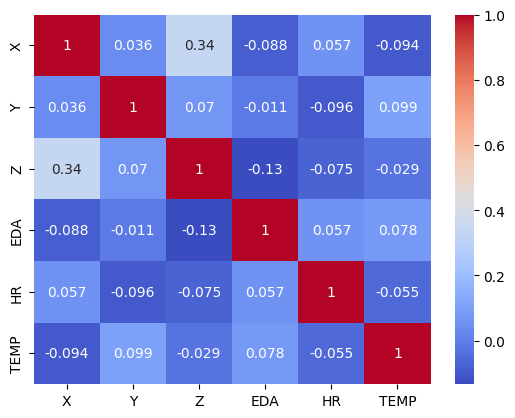

In [42]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Remove the irrelevant features by dropping the columns with low correlation
df = df.drop(['X', 'Y', 'Z'], axis=1)

# Select the highly correlated features as input for the model
X = df[['EDA', 'HR', 'TEMP']]
y = df['label']

## Splitting the dataset into training set and testing set

In [43]:
# Split the data into X (features) and y (labels)
X = df.drop(['id', 'datetime', 'label'], axis=1)
y = df['label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the label datasets
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [44]:
# Count the number of samples in each class
print(pd.Series(y_train).value_counts())

0.0    6142
1.0    6142
2.0    6142
Name: label, dtype: int64


##Building the Models

### Logistic Regression Model

In [45]:
classifier_lr = LogisticRegression(random_state=0)

classifier_lr.fit(X_train, y_train)

y_pred = classifier_lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem
prec = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem
rec = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem

results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.319477,0.300481,0.540128,0.319477


In [46]:
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

[[3610 1691  676]
 [ 426  958   97]
 [5049 5076 1542]]


####Cross Validation

In [47]:
accuracy = cross_val_score(estimator=classifier_lr,X=X_train,y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracy.std()*100))

Accuracy is 45.45 %
Standard Deviation is 1.29 %


###Random Forest Model

In [48]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

In [49]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem
prec = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem
rec = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass problem


model_results = pd.DataFrame([['Random Forest Classification', acc, f1, prec, rec]],
columns = ['Model','Accuracy','F1 Score','Precision','Recall'])

results = results.append(model_results, ignore_index=True)

results

<ipython-input-49-9379d263fd0c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.319477,0.300481,0.540128,0.319477
1,Random Forest Classification,0.882614,0.887626,0.901952,0.882614


In [50]:
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

[[ 5394   274   309]
 [   46  1355    80]
 [  802   734 10131]]


####Cross Validation

In [51]:
accuracy = cross_val_score(estimator=rf,X=X_train,y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracy.std()*100))

Accuracy is 88.44 %
Standard Deviation is 0.68 %


###Deep Neural Network

In [52]:
# Make a copy of train and test data
X_train_cnn = X_train.copy()
X_test_cnn = X_test.copy()
y_train_cnn = y_train.copy()
y_test_cnn = y_test.copy()


In [53]:
# Reshape the input data
X_train = X_train_cnn.values.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1, 1))
X_test = X_test_cnn.values.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1, 1))

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train_cnn, num_classes=3)
y_test = to_categorical(y_test_cnn, num_classes=3)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Predict on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

acc = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
prec = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
rec = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')

model_results = pd.DataFrame([['CNN', acc, f1, prec, rec]],
                             columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index=True)

results


Epoch 1/50
576/576 [==============================] - 4s 5ms/step - loss: 0.9980 - accuracy: 0.4986 - val_loss: 0.9226 - val_accuracy: 0.5275
Epoch 2/50
576/576 [==============================] - 2s 4ms/step - loss: 0.9155 - accuracy: 0.5633 - val_loss: 0.8621 - val_accuracy: 0.5680
Epoch 3/50
576/576 [==============================] - 3s 6ms/step - loss: 0.8693 - accuracy: 0.5905 - val_loss: 0.8608 - val_accuracy: 0.5582
Epoch 4/50
576/576 [==============================] - 3s 5ms/step - loss: 0.8329 - accuracy: 0.6152 - val_loss: 0.8080 - val_accuracy: 0.6139
Epoch 5/50
576/576 [==============================] - 3s 5ms/step - loss: 0.7989 - accuracy: 0.6349 - val_loss: 0.8266 - val_accuracy: 0.5837
Epoch 6/50
576/576 [==============================] - 3s 5ms/step - loss: 0.7781 - accuracy: 0.6466 - val_loss: 0.7541 - val_accuracy: 0.6305
Epoch 7/50
576/576 [==============================] - 3s 5ms/step - loss: 0.7601 - accuracy: 0.6585 - val_loss: 0.7789 - val_accuracy: 0.6165
Epoch 

<ipython-input-53-b419695d9e13>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index=True)


,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.319477,0.300481,0.540128,0.319477
1,Random Forest Classification,0.882614,0.887626,0.901952,0.882614
2,CNN,0.686745,0.715990,0.808241,0.686745


In [54]:
cm_cnn = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm_cnn)


[[4619  905  453]
 [  67 1293  121]
 [1804 2641 7222]]


**Conclusion:** *Based on the cross validations, F1 Score, Accuracies, etc. from Logistic Regression, Random Forest and Deep Neural Network models, we proceed our next step with higher accuracy and low STD which is* **Random Forest Model**

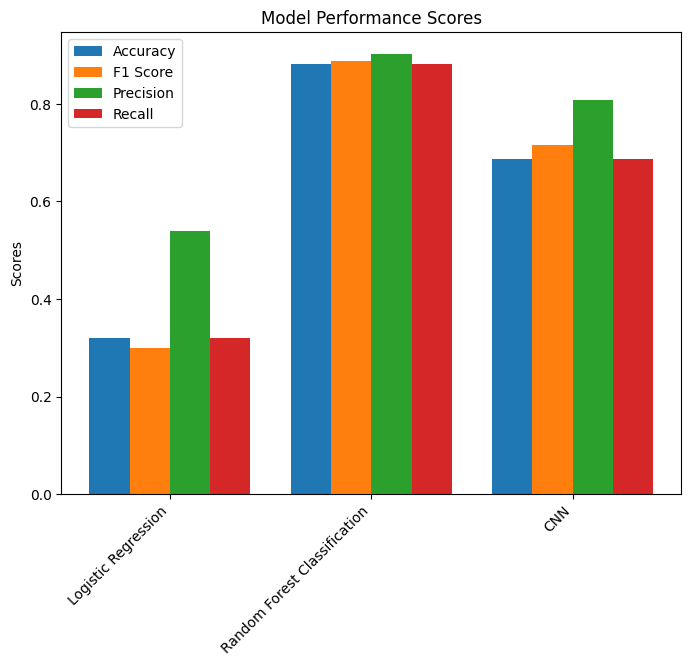

In [55]:
model_names = results['Model']
acc = results['Accuracy']
f1 = results['F1 Score']
prec = results['Precision']
rec = results['Recall']

x = np.arange(len(model_names))

width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - 1.5*width, acc, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
rects3 = ax.bar(x + 0.5*width, prec, width, label='Precision')
rects4 = ax.bar(x + 1.5*width, rec, width, label='Recall')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Scores')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

plt.show()

In [56]:
# Create a new data point to predict
X_new = np.array([[5.5, 3.2, 1.5]])

# Make the prediction
y_pred = rf.predict(X_new)

# Print the predicted stress
print("Predicted stress level:", y_pred[0])


Predicted stress level: 2.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<ipython-input-59-9922d9b4a6ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


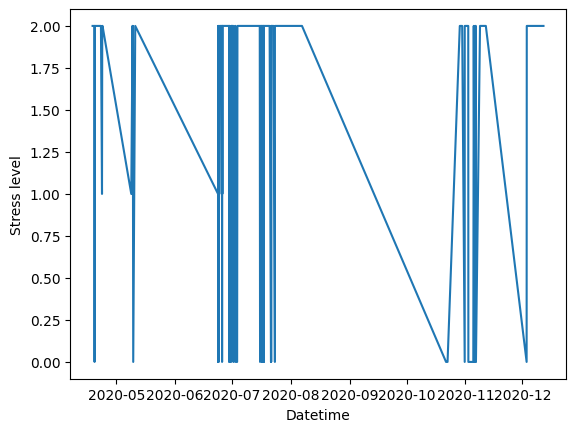

In [59]:
# Extract the stress level and datetime columns
df = df[['datetime', 'label']]

# Convert datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Group the data by datetime and calculate the mean stress level for each timestamp
df = df.groupby('datetime').mean()

# Plot the stress level against time
plt.plot(df.index, df['label'])
plt.xlabel('Datetime')
plt.ylabel('Stress level')
plt.show()
